<h2> <u> Manual Dispersion Measurement </u> </h2>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#c = 3e17 # nm/s
c = 3e8 #keeping SI units for now

In [29]:
#file_path = "/Users/jackmorse/Documents/University/Year 4/Semester 1/FYP/Physics-FYP/Data Files/Scan-1-poi-vs-stage-pos-LHS.xlsx"
file_path = "Data Files/Scan-1-poi-vs-stage-pos-LHS.xlsx"
data = pd.read_excel(file_path, skiprows=1)

In [30]:
poi = data["POI[nm]"].values
stage_pos = data["stage_pos[mm]"].values

$$\frac{d \lambda_0}{d \tau} = \frac{\pi c}{\lambda_0^2}\left(\frac{d^2 \Delta \varphi}{d \lambda^2}\right)^{-1}$$

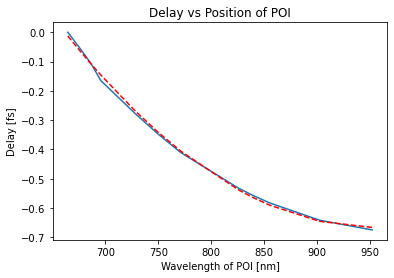

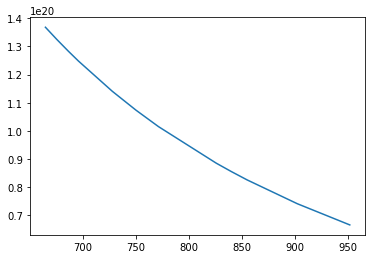

In [31]:
delay = (stage_pos - stage_pos[0])*1e-3 / 3e8
plt.plot(poi, delay*1e12)
fit_coeffs = np.polyfit(poi, delay, 2)
fit = np.polyval(fit_coeffs, poi)
plt.plot(poi, fit*1e12, linestyle = '--', color='r')
plt.ylabel("Delay [fs]")
plt.xlabel("Wavelength of POI [nm]")
plt.title("Delay vs Position of POI")
plt.show()

deriv_coeffs = np.polyder(fit_coeffs)
dLambda_0_dDelay = deriv_coeffs[0]
dispersion = (np.pi * c) / (poi**2 * dLambda_0_dDelay)
plt.plot(poi, dispersion)


# Updated section

It can be shown that the relationship between D (the group velocity dispersion) and the rate of change of the mirror position with respect to the POI wavelength is:
$$
D = \frac{1}{cL}\frac{dx}{d\lambda_{0}}
$$
where $x$ is the mirror position, $\lambda_{0}$ is the POI wavelength, $c$ is the speed of light and $L$ is the length of the fibre

## Note
We should have measured a range of stage positions that spanned approximately 2mm

In [32]:
min = min(stage_pos)
max = max(stage_pos)
print(max-min)

TypeError: 'numpy.float64' object is not callable

This is only 0.2mm.  
We must have read the scale wrong?  
Therefore will introduce a factor of 10 below to account for this

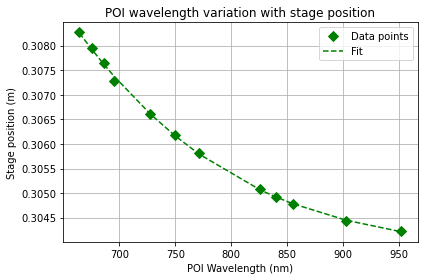

In [37]:
#Plotting stage position Vs the POI wavelength
plt.plot(poi,stage_pos*2*1e-3*10, marker='D',linestyle='', markeredgecolor='green', color='green', markersize = 7, label="Data points") #The x is actually the difference in path length so you get a factor of 2, # Multiplying by 10 to account for vernier reading error in plot

plt.xlabel("POI Wavelength (nm)")
plt.ylabel("Stage position (m)")
#plt.show()

#fit a curve to this data - plotting everything in SI units to begin with
fit_coeffs = np.polyfit(poi*1e-9, stage_pos*2*1e-3, 3) #The x is actually the difference in path length so you get a factor of 2
fit = np.polyval(fit_coeffs, poi*1e-9) 
plt.plot(poi,fit*10,color='green',linestyle='--', label="Fit") # Multiplying by 10 to account for vernier reading error in plot

plt.title("POI wavelength variation with stage position")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/Users/jackmorse/Desktop/POI-vs-stage-position.png", dpi=1200)
plt.show()

[-3088.40218843 -2913.50698416 -2744.932425   -2599.89878295
 -2149.15152478 -1863.55988736 -1615.97183923 -1079.7452439
  -965.14034423  -853.94197122  -575.20645977  -401.71118112]


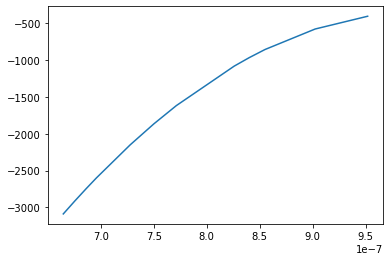

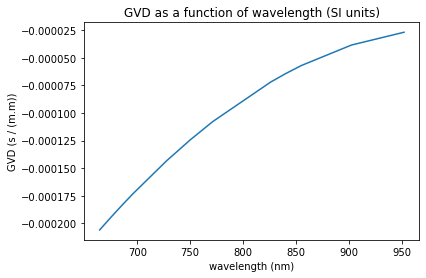

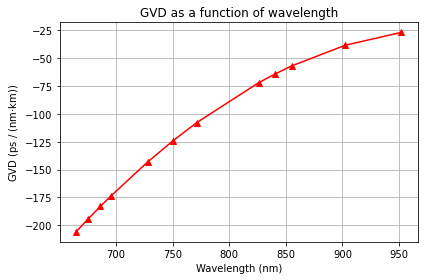

In [45]:
#get deriv of this curve
fit_coeffs = np.polyfit(poi*1e-9, stage_pos*2*1e-3, 3)
f = np.poly1d(fit_coeffs)
derivative = np.polyder(f)
y_derivative = derivative(poi*1e-9)
print(y_derivative)
plt.plot(poi*1e-9,y_derivative)
plt.show()

c=3e8
L=0.5 #Fibre length roughly half a metre?

big_D = (1/(c * L)) * y_derivative * 10 #This is the factor of 10 needed due to error in reading vernier scale
plt.plot(poi,big_D)
plt.xlabel("wavelength (nm)")
plt.ylabel("GVD (s / (m.m))")
plt.title("GVD as a function of wavelength (SI units)")
plt.show()

#Now plottong again, but for the usual unit for GVD which is ps / nm.km
c = 3e8 * 0.001 #convert c from m s^-1 to nm ps^-1
L = 0.5 * 0.001 #converting fibre length from m to km)
big_D_new_units = (1/(c*L))*y_derivative*10 #This is the factor of 10 needed due to error in reading vernier scale

fit_coeffs_2 = np.polyfit(poi*1e-9, big_D_new_units, 3) #The x is actually the difference in path length so you get a factor of 2
fit_2 = np.polyval(fit_coeffs_2, poi*1e-9) 
plt.plot(poi,big_D_new_units, marker = '^', color='r', linestyle='', label="Data points")
plt.plot(poi, fit_2, color='r', label = "GVD Fit")
plt.xlabel("Wavelength (nm)")
plt.ylabel("GVD (ps / (nm$\cdot$km))")
plt.title("GVD as a function of wavelength")
plt.grid()
plt.tight_layout()
plt.savefig("/Users/jackmorse/Desktop/Manual-GVD.png", dpi=1200)
plt.show()